
Features scaled using StandardScaler.

Custom KNN model trained successfully with k=5.

Accuracy of Custom KNN model: 0.3700

Classification Report (Custom KNN):
               precision    recall  f1-score   support

     Class 1       0.39      0.42      0.40        60
     Class 2       0.27      0.21      0.23        39
     Class 3       0.40      0.45      0.42        55
     Class 4       0.37      0.35      0.36        46

    accuracy                           0.37       200
   macro avg       0.36      0.36      0.35       200
weighted avg       0.36      0.37      0.37       200



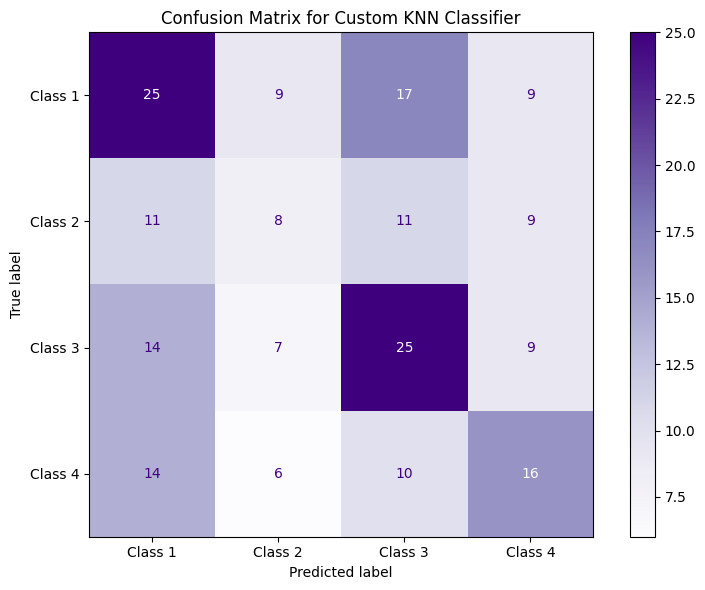

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv(r'G:\AI\AI\Homework AI\lesson-17\classwork\telecustomers.csv')
X=df.drop(['custcat'], axis=1)
y= df['custcat']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset indices to ensure alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- Custom KNN Class (Modified for Multiple Predictions) ---
class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def _predict_single_instance(self, x_test_instance):
        distances = np.sqrt(np.sum((x_test_instance - self.X_train) ** 2, axis=1))
        k_nearest_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = self.y_train[k_nearest_indices]
        label_counts = Counter(k_nearest_labels)
        most_common_label = label_counts.most_common(1)[0][0]
        return most_common_label

    def predict(self, X_test):
        predictions = [self._predict_single_instance(x_test_instance) for x_test_instance in X_test]
        return np.array(predictions)

# 3. Feature Scaling (Crucial for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled using StandardScaler.")

# 4. Train Custom KNN Model
# Instantiate your custom KNN class
my_knn_model = KNN(n_neighbors=5) # Using k=5 as an example
my_knn_model.fit(X_train_scaled, y_train) # Fit the model (stores X_train_scaled, y_train)

print(f"\nCustom KNN model trained successfully with k={my_knn_model.n_neighbors}.")

# 5. Make Predictions on the Scaled Test Set
# Now, predict will process all instances in X_test_scaled
y_pred_custom_knn = my_knn_model.predict(X_test_scaled)

# 6. Evaluate the Model
# Define target names based on unique class labels in the dataset
target_names = [f"Class {label}" for label in sorted(y.unique())]

accuracy = accuracy_score(y_test, y_pred_custom_knn)
print(f"\nAccuracy of Custom KNN model: {accuracy:.4f}")

print("\nClassification Report (Custom KNN):\n", classification_report(y_test, y_pred_custom_knn, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_custom_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Purples, ax=ax)
ax.set_title("Confusion Matrix for Custom KNN Classifier")
plt.tight_layout()
plt.show()


In [ ]:
# Nonparametric model
from collections import Counter

class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = X
        self.y = y
        return self

    def predict(self, X):
        # shape of (n, m)
        # n - observations
        # m - number of features
        distances = np.sqrt(np.sum((X - self.X) ** 2, axis=1))
        idx = np.argsort(distances)[:self.n_neighbors]
        classes = self.y[idx]
        cntr = Counter(classes)
        return cntr.most_common(1)[0][0].item()


In [ ]:
# --- Custom KNN Class (Modified for Multiple Predictions) ---
class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        # Store the training data and labels
        self.X_train = X
        self.y_train = y
        return self

    def _predict_single_instance(self, x_test_instance):
        """
        Helper method to predict the class for a single test instance.
        """
        # Calculate Euclidean distances from the single test instance
        # to all training instances.
        # x_test_instance is (n_features,)
        # self.X_train is (n_training_samples, n_features)
        # The subtraction (x_test_instance - self.X_train) will broadcast correctly.
        distances = np.sqrt(np.sum((x_test_instance - self.X_train) ** 2, axis=1))

        # Get the indices of the k_neighbors smallest distances
        # np.argsort returns indices that would sort the array
        # [:self.n_neighbors] takes the first 'n_neighbors' indices (smallest distances)
        k_nearest_indices = np.argsort(distances)[:self.n_neighbors]

        # Get the labels of the k_neighbors nearest training samples
        k_nearest_labels = self.y_train[k_nearest_indices]

        # Count the occurrences of each label among the k neighbors
        # Counter creates a dictionary-like object: {label: count}
        label_counts = Counter(k_nearest_labels)

        # Find the most common label
        # .most_common(1) returns a list of the single most common item: [(label, count)]
        # [0][0] extracts the label itself.
        # .item() is used to convert a NumPy scalar (if y_train was int/float) to a standard Python int/float.
        most_common_label = label_counts.most_common(1)[0][0]

        return most_common_label

    def predict(self, X_test):
        """
        Predicts the class for multiple test instances.

        Args:
            X_test (np.ndarray): A 2D NumPy array of test features (n_samples_test, n_features).

        Returns:
            np.ndarray: A 1D NumPy array of predicted class labels for each test instance.
        """
        # Apply the _predict_single_instance method to each row (instance) in X_test
        # using a list comprehension.
        predictions = [self._predict_single_instance(x_test_instance) for x_test_instance in X_test]
        
        return np.array(predictions) # Convert the list of predictions to a NumPy array